In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import local.lib.timeseries as ts
%matplotlib inline

# **Cargando los datos desde Drive...**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"####"})
downloaded.GetContentFile("DB_SIPSA.csv")

#La base de datos puede descargarse de: https://www.dane.gov.co/index.php/estadisticas-por-tema/agropecuario/sistema-de-informacion-de-precios-sipsa/componente-precios-mayoristas

In [ ]:
df = pd.read_csv('DB_SIPSA.csv', sep=';', encoding='latin-1')

In [ ]:
df = pd.DataFrame(df)
df.head()

,Fecha,Ciudad,Gasto Básico,Precio
0,12 de junio de 2012,Bogotá,Hortalizas y verduras,NaN
1,12 de junio de 2012,Bogotá,Ahuyama,"800,00"
2,12 de junio de 2012,Bogotá,Arveja verde en vaina,"2.200,00"
3,12 de junio de 2012,Bogotá,Cebolla cabezona blanca,"1.150,00"
4,12 de junio de 2012,Bogotá,Cebolla junca,"1.000,00"


In [ ]:
df.shape

(1032360, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032360 entries, 0 to 1032359
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Fecha         1032360 non-null  object
 1   Ciudad        1031856 non-null  object
 2   Gasto Básico  1004645 non-null  object
 3    Precio       877397 non-null   object
dtypes: object(4)
memory usage: 31.5+ MB


In [ ]:
df.columns

Index(['Fecha', 'Ciudad', 'Gasto Básico', ' Precio '], dtype='object')

# **Preparando los datos...**

## Realizando la limpieza sobre la columna Fecha:

In [ ]:
#Se elimina la palabra "de" en cada registro de la columna Fecha
df['Fecha'] = df['Fecha'].replace({'de': ''}, regex=True)
df.head()

,Fecha,Ciudad,Gasto Básico,Precio
0,12 junio 2012,Bogotá,Hortalizas y verduras,NaN
1,12 junio 2012,Bogotá,Ahuyama,"800,00"
2,12 junio 2012,Bogotá,Arveja verde en vaina,"2.200,00"
3,12 junio 2012,Bogotá,Cebolla cabezona blanca,"1.150,00"
4,12 junio 2012,Bogotá,Cebolla junca,"1.000,00"


In [ ]:
#Se extrae el año de la columna fecha, y se inserta una nueva columna en la primera posición a la izquierda
AAAA = df['Fecha'].str[-4:]
df.insert(0, "AAAA", AAAA, True)
df.tail()

,AAAA,Fecha,Ciudad,Gasto Básico,Precio
1032355,2020,27 noviembre 2020,"Villavicencio, CAV",Plátano hartón verde,"1.460,00"
1032356,2020,27 noviembre 2020,"Villavicencio, CAV",Yuca*,"846,00"
1032357,2020,27 noviembre 2020,"Villavicencio, CAV",*Variedad predominante en el mercado,NaN
1032358,2020,27 noviembre 2020,"Villavicencio, CAV",Var%: Variación porcentual con respecto al pro...,NaN
1032359,2020,27 noviembre 2020,"Villavicencio, CAV",NaN,NaN


In [ ]:
#Se hallan los valores únicos de la nueva columna AAAA
df.AAAA.unique()

array(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'], dtype=object)

In [ ]:
#Se extrae el mes de la columna fecha, y se inserta una nueva columna en la primera posición a la izquierda
MM = df['Fecha'].str.split(' ? ').str[1]
df.insert(0, "MM", MM, True)
df.tail()

,MM,AAAA,Fecha,Ciudad,Gasto Básico,Precio
1032355,noviembre,2020,27 noviembre 2020,"Villavicencio, CAV",Plátano hartón verde,"1.460,00"
1032356,noviembre,2020,27 noviembre 2020,"Villavicencio, CAV",Yuca*,"846,00"
1032357,noviembre,2020,27 noviembre 2020,"Villavicencio, CAV",*Variedad predominante en el mercado,NaN
1032358,noviembre,2020,27 noviembre 2020,"Villavicencio, CAV",Var%: Variación porcentual con respecto al pro...,NaN
1032359,noviembre,2020,27 noviembre 2020,"Villavicencio, CAV",NaN,NaN


In [ ]:
#Se llevan a mayúscula todos los meses, y se determinan los valores únicos
df['MM'] = df['MM'].str.upper()
df.MM.unique()

array(['JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE',
       'DICIEMBRE', 'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO',
       'SEPTIEMBE', 'FEBRERA', 'DCIEMBRE', 'DICIENBRE', 'ABR', 'GOSTO',
       '10'], dtype=object)

In [ ]:
df.MM.unique()

array(['JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE',
       'DICIEMBRE', 'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO',
       'SEPTIEMBE', 'FEBRERA', 'DCIEMBRE', 'DICIENBRE', 'ABR', 'GOSTO',
       '10'], dtype=object)

In [ ]:
#Se reemplazan las variantes de los meses por un mismo valor
#df[df['MM']=='10']['Fecha'].head()
df["MM"].replace({"SEPTIEMBE": "SEPTIEMBRE", "FEBRERA": "FEBRERO", "DCIEMBRE": "DICIEMBRE", "DICIENBRE": "DICIEMBRE", "ABR": "ABRIL", "GOSTO": "AGOSTO", "10": "OCTUBRE"}, inplace=True)

In [ ]:
#Se verifica que existan 12 valores únicos para los meses
months = df.MM.unique()
print(months)
print(len(months))

['JUNIO' 'JULIO' 'AGOSTO' 'SEPTIEMBRE' 'OCTUBRE' 'NOVIEMBRE' 'DICIEMBRE'
 'ENERO' 'FEBRERO' 'MARZO' 'ABRIL' 'MAYO']
12


In [ ]:
#Se homologa y estandariza el formato de los meses
df["MM"].replace({"ENERO": "01", "FEBRERO": "02", "MARZO": "03", "ABRIL": "04", "MAYO": "05", "JUNIO": "06", "JULIO": "07", "AGOSTO": "08", "SEPTIEMBRE": "09", "OCTUBRE": "10", "NOVIEMBRE": "11", "DICIEMBRE": "12"}, inplace=True)

In [ ]:
#Se extrae el día de la columna fecha, y se inserta una nueva columna en la primera posición a la izquierda
DD = df['Fecha'].str[:2]
df.insert(0, "DD", DD, True)
df.tail()

,DD,MM,AAAA,Fecha,Ciudad,Gasto Básico,Precio
1032355,27,11,2020,27 noviembre 2020,"Villavicencio, CAV",Plátano hartón verde,"1.460,00"
1032356,27,11,2020,27 noviembre 2020,"Villavicencio, CAV",Yuca*,"846,00"
1032357,27,11,2020,27 noviembre 2020,"Villavicencio, CAV",*Variedad predominante en el mercado,NaN
1032358,27,11,2020,27 noviembre 2020,"Villavicencio, CAV",Var%: Variación porcentual con respecto al pro...,NaN
1032359,27,11,2020,27 noviembre 2020,"Villavicencio, CAV",NaN,NaN


In [ ]:
#Se determinan los valores únicos en la columna DD
df.DD.unique()

array(['12', '13', '14', '15', '19', '20', '21', '22', '25', '26', '28',
       '29', '3 ', '4 ', '5 ', '10', '11', '16', '17', '18', '23', '24',
       '27', '30', '31', '1 ', '02', '6 ', '8 ', '9 ', '7 ', '2 ', '08',
       '09', '04', '03', '06', '07', '01', '05'], dtype=object)

In [ ]:
#Se estandarizan los días según el formato DD
df['DD'] = df['DD'].replace({'1 ': '01'}, regex=True)
df['DD'] = df['DD'].replace({'2 ': '02'}, regex=True)
df['DD'] = df['DD'].replace({'3 ': '03'}, regex=True)
df['DD'] = df['DD'].replace({'4 ': '04'}, regex=True)
df['DD'] = df['DD'].replace({'5 ': '05'}, regex=True)
df['DD'] = df['DD'].replace({'6 ': '06'}, regex=True)
df['DD'] = df['DD'].replace({'7 ': '07'}, regex=True)
df['DD'] = df['DD'].replace({'8 ': '08'}, regex=True)
df['DD'] = df['DD'].replace({'9 ': '09'}, regex=True)

In [ ]:
#Se verifica que existan 31 valores únicos posibles para los años
days = df.DD.unique()
print(days)
print(len(days))

['12' '13' '14' '15' '19' '20' '21' '22' '25' '26' '28' '29' '03' '04'
 '05' '10' '11' '16' '17' '18' '23' '24' '27' '30' '31' '01' '02' '06'
 '08' '09' '07']
31


In [ ]:
#Se reemplaza la columna Fecha por la concatenación del año, el mes y el día
df['Fecha'] = df['AAAA'].map(str) + '-' + df['MM'].map(str) + '-' + df['DD'].map(str)
df.head()

,DD,MM,AAAA,Fecha,Ciudad,Gasto Básico,Precio
0,12,06,2012,2012-06-12,Bogotá,Hortalizas y verduras,NaN
1,12,06,2012,2012-06-12,Bogotá,Ahuyama,"800,00"
2,12,06,2012,2012-06-12,Bogotá,Arveja verde en vaina,"2.200,00"
3,12,06,2012,2012-06-12,Bogotá,Cebolla cabezona blanca,"1.150,00"
4,12,06,2012,2012-06-12,Bogotá,Cebolla junca,"1.000,00"


## Realizando la limpieza sobre la columna Ciudad:

In [ ]:
df.Ciudad.unique()

array(['Bogotá', 'Medellín', 'Cali', 'Pereira', 'Bucaramanga',
       'Barranquilla', 'Cúcuta', 'Armenia', 'Cartagena',
       'Bogotá, Corabastos', 'Medellín, Central Mayorista',
       'Cali, Cavasa', 'Pereira, Mercasa', 'Bucaramanga, Centroabastos',
       'Barranquilla, Granabastos', 'Cúcuta, Cenabastos',
       'Cartagena, Bazurto', 'Medellín, \nCMA', 'Cali, \nSanta Helena',
       'Pereira, \nMercasa', 'Medellín, CMA', 'Cali, \nCavasa',
       'Pereira, \nLa 41', 'Ibagué', 'Manizales (Caldas)',
       'Armenia, Mercar', 'Ibagué, \nPlaza La 21', 'Medellín,\nCMA',
       'Montería (Córdoba)', 'Valledupar, Mercabastos',
       'Villavicencio, Llanoabastos', 'Ibagué, \nLa 21', 'Valledupar',
       'Villavicencio', nan, 'Bucaramanga\nCentroabastos',
       'Cúcuta\nCenabastos', 'Ibagué\nPlaza La 21', 'Villavicencio, CAV',
       'Bogotá D.C., Corabastos', 'Valledupar,\nMercabastos',
       'Villavicencio CAV', 'Pasto (Nariño)', 'Sincelejo (Sucre)',
       'Neiva, Surabastos', 'Tunja (

In [ ]:
#Se eliminan las filas con datos faltantes en la columna Ciudad
df = df.dropna(how='all', subset=['Ciudad'])
s_ciudad = sum(df["Ciudad"] == "")
print(s_ciudad)
df.head()

0


,DD,MM,AAAA,Fecha,Ciudad,Gasto Básico,Precio
0,12,06,2012,2012-06-12,Bogotá,Hortalizas y verduras,NaN
1,12,06,2012,2012-06-12,Bogotá,Ahuyama,"800,00"
2,12,06,2012,2012-06-12,Bogotá,Arveja verde en vaina,"2.200,00"
3,12,06,2012,2012-06-12,Bogotá,Cebolla cabezona blanca,"1.150,00"
4,12,06,2012,2012-06-12,Bogotá,Cebolla junca,"1.000,00"


In [ ]:
#Se eliminan todos los valores faltantes de Gasto Básico, ya que son filas nulas del dataset
df = df.dropna(how='all', subset=['Gasto Básico'])

In [ ]:
#Se imprimen los valores únicos de la columna Gasto Básico, en orden alfabético, con el fin de observar si hay valores duplicados
my_arr = np.sort(df["Gasto Básico"].unique())

for val in my_arr:
    print(val)

* : Variedad predominante en el mercado
*Variedad predominante en el mercado
Aguacate *
Aguacate papelillo
Aguacate*
Ahuyama
Arracacha *
Arracacha*
Arveja verde en vaina
Banano
Banano criollo
Banano*
Cebolla cabezona blanca
Cebolla junca
Chocolo mazorca
Chócolo mazorca
Coco
Fresa
Frutas
Frutas frescas
Fríjol verde en vaina*
Fríjol verde*
Granadilla
Guayaba pera
Guayaba*
Habichuela
Hortalizas y verduras
Lechuga batavia
Limón Común
Limón Tahití
Limón común
Lulo
Mandarina *
Mandarina*
Mango Tommy
Mango tommy
Manzana royal gala
Maracuyá
Mora de Castilla
Naranja *
Naranja Valencia
Naranja*
Papa  criolla
Papa  negra*
Papa criolla
Papa negra *
Papa negra*
Papaya Maradol
Papaya maradol
Pepino cohombro
Pimentón
Piña *
Plátano guineo
Plátano hartón verde
Remolacha
Tomate *
Tomate de árbol
Tomate*
Tubérculos y plátanos
Tubérculos, plátanos
Var% : Variación porcentual con respecto al promedio del día de mercado anterior en la misma plaza
Var%: Variación porcentual con respecto al promedio del día 

In [ ]:
#Se eliminan los registros cuyo 'Gasto Básico' es irrelevante, por corresponder a notas aclaratorias; se hace un chequeo sobre los últimos registros
my_list = ['* : Variedad predominante en el mercado', '*Variedad predominante en el mercado', 
           'Var% : Variación porcentual con respecto al promedio del día de mercado anterior en la misma plaza', 
           'Var%: Variación porcentual con respecto al promedio del día anterior de mercado', 
           'Var%: Variación porcentual con respecto al promedio del día de mercado anterior de la misma plaza', 
           'n.d. : no disponible']

for i in my_list: 
           df.drop(df[df['Gasto Básico'] == i].index, inplace=True)

df.tail()

,DD,MM,AAAA,Fecha,Ciudad,Gasto Básico,Precio
1032352,27,11,2020,2020-11-27,"Villavicencio, CAV",Papa criolla,"1.100,00"
1032353,27,11,2020,2020-11-27,"Villavicencio, CAV",Papa negra*,"560,00"
1032354,27,11,2020,2020-11-27,"Villavicencio, CAV",Plátano guineo,"2.083,00"
1032355,27,11,2020,2020-11-27,"Villavicencio, CAV",Plátano hartón verde,"1.460,00"
1032356,27,11,2020,2020-11-27,"Villavicencio, CAV",Yuca*,"846,00"


In [ ]:
#Se llevan a mayúscula inicial todos los valores de la columna Gasto Básico, con el fin de estandarizar los términos; se homologan términos y se imprimen valores únicos, con el fin de identificar los términos semejantes
df['Gasto Básico'] = df['Gasto Básico'].str.capitalize()
df["Gasto Básico"].replace({"Frutas": "Frutas frescas", "Tubérculos, plátanos": "Tubérculos y plátanos", "Chocolo mazorca": "Chócolo mazorca", "Papa  criolla": "Papa criolla"}, inplace=True)
df['Gasto Básico'].unique()

array(['Hortalizas y verduras', 'Ahuyama', 'Arveja verde en vaina',
       'Cebolla cabezona blanca', 'Cebolla junca', 'Chócolo mazorca',
       'Habichuela', 'Pepino cohombro', 'Pimentón', 'Remolacha',
       'Tomate*', 'Zanahoria', 'Frutas frescas', 'Aguacate *', 'Banano*',
       'Coco', 'Granadilla', 'Guayaba*', 'Limón común', 'Limón tahití',
       'Lulo', 'Mandarina*', 'Mango tommy', 'Maracuyá',
       'Mora de castilla', 'Naranja valencia', 'Papaya maradol', 'Piña *',
       'Tomate de árbol', 'Tubérculos y plátanos', 'Arracacha*',
       'Papa negra*', 'Papa criolla', 'Plátano guineo',
       'Plátano hartón verde', 'Yuca*', 'Tomate *', 'Banano criollo',
       'Guayaba pera', 'Mandarina *', 'Arracacha *', 'Papa negra *',
       'Yuca', 'Aguacate papelillo', 'Naranja*', 'Naranja *',
       'Fríjol verde en vaina*', 'Lechuga batavia', 'Banano',
       'Manzana royal gala', 'Fríjol verde*', 'Aguacate*', 'Papa  negra*',
       'Fresa'], dtype=object)

In [ ]:
#Se eliminan los espacios en blanco al comienzo y final de cada término asociado al gasto básico, y se suprimen los asteriscos que contengan; se imprimen los valores resultantes para garantizar unicidad
df['Gasto Básico'] = df['Gasto Básico'].str.strip()
df['Gasto Básico'] = df['Gasto Básico'].str.translate({42: None})
df['Gasto Básico'].unique()

array(['Hortalizas y verduras', 'Ahuyama', 'Arveja verde en vaina',
       'Cebolla cabezona blanca', 'Cebolla junca', 'Chócolo mazorca',
       'Habichuela', 'Pepino cohombro', 'Pimentón', 'Remolacha', 'Tomate',
       'Zanahoria', 'Frutas frescas', 'Aguacate ', 'Banano', 'Coco',
       'Granadilla', 'Guayaba', 'Limón común', 'Limón tahití', 'Lulo',
       'Mandarina', 'Mango tommy', 'Maracuyá', 'Mora de castilla',
       'Naranja valencia', 'Papaya maradol', 'Piña ', 'Tomate de árbol',
       'Tubérculos y plátanos', 'Arracacha', 'Papa negra', 'Papa criolla',
       'Plátano guineo', 'Plátano hartón verde', 'Yuca', 'Tomate ',
       'Banano criollo', 'Guayaba pera', 'Mandarina ', 'Arracacha ',
       'Papa negra ', 'Aguacate papelillo', 'Naranja', 'Naranja ',
       'Fríjol verde en vaina', 'Lechuga batavia', 'Manzana royal gala',
       'Fríjol verde', 'Aguacate', 'Papa  negra', 'Fresa'], dtype=object)

In [ ]:
#Se lleva a tipo fecha y se indexa la columna Fecha
df.index = pd.to_datetime(df.Fecha)
del(df["Fecha"])
df.head()

,DD,MM,AAAA,Ciudad,Gasto Básico,Precio
Fecha,,,,,,
2012-06-12,12,06,2012,Bogotá,Hortalizas y verduras,NaN
2012-06-12,12,06,2012,Bogotá,Ahuyama,"800,00"
2012-06-12,12,06,2012,Bogotá,Arveja verde en vaina,"2.200,00"
2012-06-12,12,06,2012,Bogotá,Cebolla cabezona blanca,"1.150,00"
2012-06-12,12,06,2012,Bogotá,Cebolla junca,"1.000,00"


In [ ]:
#Se eliminan los valores irrelevantes de la columna Precio
df[' Precio '] = df[' Precio '].replace({'n.d.': None, 'c': None}, regex=True)

In [ ]:
#Se eliminan los espacios en blanco de la columna Precio, se reemplazan el punto decimal por coma y se suprime el punto de unidades de mil, para poder castear el precio a flotante
df[' Precio '] = df[' Precio '].str.strip()
df[' Precio '] = df[' Precio '].str.translate({46: ''})
df[' Precio '] = df[' Precio '].str.translate({44: '.'})
#df[' Precio '] = df[' Precio '].astype(float)
df[' Precio '] = pd.to_numeric(df[' Precio '], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 950943 entries, 2012-06-12 to 2020-11-27
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DD            950943 non-null  object 
 1   MM            950943 non-null  object 
 2   AAAA          950943 non-null  object 
 3   Ciudad        950943 non-null  object 
 4   Gasto Básico  950943 non-null  object 
 5    Precio       722348 non-null  float64
dtypes: float64(1), object(5)
memory usage: 50.8+ MB


In [ ]:
#Para esta primera iteración, se imputará por la media; en la siguiente iteración, se reemplazará cada valor faltante por el último precio no nulo del respectivo grupo básico.

#precio_nan = df.loc[pd.isna(df[' Precio ']), :].index
s = df.groupby('Gasto Básico')[' Precio '].transform('mean')
df[' Precio '].fillna(s, inplace=True)

In [ ]:
df.head()

,DD,MM,AAAA,Ciudad,Gasto Básico,Precio
Fecha,,,,,,
2012-06-12,12,06,2012,Bogotá,Hortalizas y verduras,NaN
2012-06-12,12,06,2012,Bogotá,Ahuyama,800.0
2012-06-12,12,06,2012,Bogotá,Arveja verde en vaina,2200.0
2012-06-12,12,06,2012,Bogotá,Cebolla cabezona blanca,1150.0
2012-06-12,12,06,2012,Bogotá,Cebolla junca,1000.0


In [ ]:
df.tail()

,DD,MM,AAAA,Ciudad,Gasto Básico,Precio
Fecha,,,,,,
2020-11-27,27,11,2020,"Villavicencio, CAV",Papa criolla,1100.0
2020-11-27,27,11,2020,"Villavicencio, CAV",Papa negra,560.0
2020-11-27,27,11,2020,"Villavicencio, CAV",Plátano guineo,2083.0
2020-11-27,27,11,2020,"Villavicencio, CAV",Plátano hartón verde,1460.0
2020-11-27,27,11,2020,"Villavicencio, CAV",Yuca,846.0


In [ ]:
#Para esta primera iteración se someterá a análisis el comportamiento del precio de un único gasto básico: en este caso, "Arracacha", para una única plaza de mercado: Bogotá
df_arracacha = df[(df['Gasto Básico'] == 'Arracacha')&(df['Ciudad'] == 'Bogotá')]

In [ ]:
df_arracacha.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2012-06-12 to 2012-10-19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DD            83 non-null     object 
 1   MM            83 non-null     object 
 2   AAAA          83 non-null     object 
 3   Ciudad        83 non-null     object 
 4   Gasto Básico  83 non-null     object 
 5    Precio       83 non-null     float64
dtypes: float64(1), object(5)
memory usage: 4.5+ KB


In [ ]:
df_arracacha.tail()

,DD,MM,AAAA,Ciudad,Gasto Básico,Precio
Fecha,,,,,,
2012-10-12,12,10,2012,Bogotá,Arracacha,917.0
2012-10-16,16,10,2012,Bogotá,Arracacha,861.0
2012-10-17,17,10,2012,Bogotá,Arracacha,889.0
2012-10-18,18,10,2012,Bogotá,Arracacha,819.0
2012-10-19,19,10,2012,Bogotá,Arracacha,889.0


In [ ]:
#Se eliminan las columnas irrelevantes y/o redundantes en el nuevo dataframe
df_arracacha.drop(['DD', 'MM', 'AAAA', 'Ciudad', 'Gasto Básico'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_arracacha.head()

,Precio
Fecha,
2012-06-12,979.17
2012-06-13,875.00
2012-06-14,1000.00
2012-06-15,937.50
2012-06-19,979.17


In [ ]:
df_arracacha.tail()

,Precio
Fecha,
2012-10-12,917.0
2012-10-16,861.0
2012-10-17,889.0
2012-10-18,819.0
2012-10-19,889.0


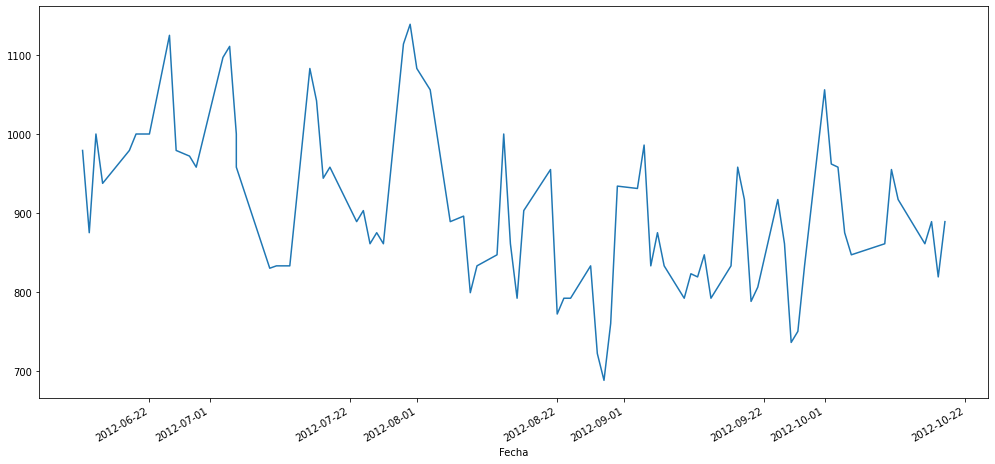

In [ ]:
#Se visualiza el comportamiento del precio de la arracacha en el tiempo
df_arracacha[" Precio "].plot(figsize=(17,8))

In [ ]:
type(df_arracacha)

pandas.core.frame.DataFrame

# **Creando el modelo predictivo...**

##Se creará primero una serie de tiempo con rezago ("look back"):

In [ ]:
!pip install timeseries
import local.lib.timeseries as ts
dt = ts.timeseries_as_many2one(df_arracacha, columns=[" Precio "], nb_timesteps_in=4, timelag=0)
dt.head()

  Created wheel for timeseries: filename=timeseries-0.5.0-cp36-none-any.whl size=7203 sha256=3406bc075fdfb0e4a3e4d3dc2fd0dc10cfd15045258c7ecf34e7280c12c2f05f
  Stored in directory: /root/.cache/pip/wheels/c0/c1/f5/bccb8d7f62c60d0ee2014b3ae8a9f132ed2904002edfce359e
Successfully built timeseries


,Precio _0,Precio _1,Precio _2,Precio _3,Precio
Fecha,,,,,
2012-06-19,979.17,875.00,1000.00,937.50,979.17
2012-06-20,875.00,1000.00,937.50,979.17,1000.00
2012-06-21,1000.00,937.50,979.17,1000.00,1000.00
2012-06-22,937.50,979.17,1000.00,1000.00,1000.00
2012-06-25,979.17,1000.00,1000.00,1000.00,1125.00


##Se divide el dataset en los conjuntos de entrenamiento y prueba:

(85, 5) (33, 5) (20, 5)


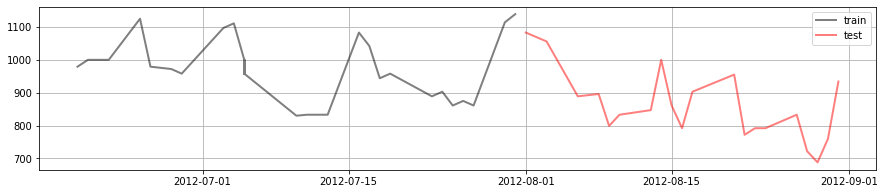

In [ ]:
trds = dt[dt.index.month<8]
tsds = dt[dt.index.month==8]
print(dt.shape, trds.shape, tsds.shape)
plt.figure(figsize=(15,3))
plt.plot(trds.index.values, trds[' Precio '].values, color="black", lw=2, label="train", alpha=.5)
plt.plot(tsds.index.values, tsds[' Precio '].values, color="red", lw=2, label="test", alpha=.5)
plt.grid();
plt.legend();

##Se crean las matrices X e y para los conjuntos de entrenamiento y prueba:

In [ ]:
Xtr, ytr = trds[[i for i in trds.columns if i!=" Precio "]].values, trds[' Precio '].values
Xts, yts = tsds[[i for i in tsds.columns if i!=" Precio "]].values, tsds[' Precio '].values

In [ ]:
trds[:5]

,Precio _0,Precio _1,Precio _2,Precio _3,Precio
Fecha,,,,,
2012-06-19,979.17,875.00,1000.00,937.50,979.17
2012-06-20,875.00,1000.00,937.50,979.17,1000.00
2012-06-21,1000.00,937.50,979.17,1000.00,1000.00
2012-06-22,937.50,979.17,1000.00,1000.00,1000.00
2012-06-25,979.17,1000.00,1000.00,1000.00,1125.00


In [ ]:
print (Xtr[:10])
print (ytr[:10])

[[ 979.17  875.   1000.    937.5 ]
 [ 875.   1000.    937.5   979.17]
 [1000.    937.5   979.17 1000.  ]
 [ 937.5   979.17 1000.   1000.  ]
 [ 979.17 1000.   1000.   1000.  ]
 [1000.   1000.   1000.   1125.  ]
 [1000.   1000.   1125.    979.17]
 [1000.   1125.    979.17  972.  ]
 [1125.    979.17  972.    958.  ]
 [ 979.17  972.    958.   1097.  ]]
[ 979.17 1000.   1000.   1000.   1125.    979.17  972.    958.   1097.
 1111.  ]


In [ ]:
tsds[:5]

,Precio _0,Precio _1,Precio _2,Precio _3,Precio
Fecha,,,,,
2012-08-01,875.0,861.0,1114.0,1139.0,1083.0
2012-08-03,861.0,1114.0,1139.0,1083.0,1056.0
2012-08-06,1114.0,1139.0,1083.0,1056.0,889.0
2012-08-08,1139.0,1083.0,1056.0,889.0,896.0
2012-08-09,1083.0,1056.0,889.0,896.0,799.0


In [ ]:
print (Xts[:10])
print (yts[:20])

[[ 875.  861. 1114. 1139.]
 [ 861. 1114. 1139. 1083.]
 [1114. 1139. 1083. 1056.]
 [1139. 1083. 1056.  889.]
 [1083. 1056.  889.  896.]
 [1056.  889.  896.  799.]
 [ 889.  896.  799.  833.]
 [ 896.  799.  833.  847.]
 [ 799.  833.  847. 1000.]
 [ 833.  847. 1000.  861.]]
[1083. 1056.  889.  896.  799.  833.  847. 1000.  861.  792.  903.  955.
  772.  792.  792.  833.  722.  688.  760.  934.]


##Se convierte el problema en una tarea de clasificación para predicción de tendencias del precio, con las siguientes etiquetas: 1 arriba/sube, 0 abajo/baja:

In [ ]:
#df_arracacha['Variación'] = df_arracacha.diff()
#df_arracacha['Tendencia'] = np.where(df_arracacha['Variación'] < 0, "Bajó", np.where(df_arracacha['Variación'] > 0, "Subió", "Estable"))
#df_arracacha.head(13)

In [ ]:
yts = (yts>Xts[:,-1]).astype(int)
ytr = (ytr>Xtr[:,-1]).astype(int)
print (ytr[:20])
print (yts[:20])

[1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0]
[0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1]


##Se inspecciona la distribución de las clases:

In [ ]:
print ("1's in train %.2f%s"%(np.mean(ytr)*100, "%"))
print ("1's in test  %.2f%s"%(np.mean(yts)*100, "%"))

1's in train 39.39%
1's in test  50.00%


##Se entrena el modelo predictivo:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

estimator = RandomForestClassifier(n_estimators=5, max_depth=30)
#estimator = DecisionTreeClassifier(max_depth=2)
#estimator = LogisticRegression()
#estimator = Pipeline((("pca", PCA(n_components=2)), ("estimator", estimator)))
estimator.fit(Xtr, ytr);

##Se calcula la precisión del modelo para los conjuntos de entrenamiento y prueba:

In [ ]:
print ("train accuracy %.2f"%estimator.score(Xtr,ytr))
print ("test accuracy  %.2f"%estimator.score(Xts,yts))

train accuracy 0.97
test accuracy  0.60


##Se obtiene la matriz de confusión:

Text(0.5, 1.0, 'Confusion Matrix')

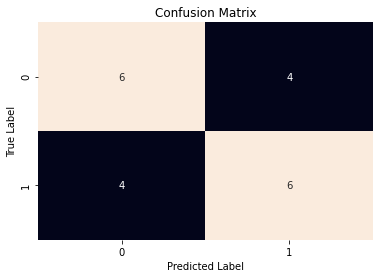

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(yts, estimator.predict(Xts))
sns.heatmap(cm, annot=True, cbar=False, fmt=".2g")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

##Se reproduce el mismo análisis anterior para el mismo alimento: Arracacha, pero para una ciudad diferente: Cali.



In [ ]:
df_arracacha2 = df[(df['Gasto Básico'] == 'Arracacha')&(df['Ciudad'] == 'Cali')]

In [ ]:
df_arracacha2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2012-06-12 to 2012-10-19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DD            83 non-null     object 
 1   MM            83 non-null     object 
 2   AAAA          83 non-null     object 
 3   Ciudad        83 non-null     object 
 4   Gasto Básico  83 non-null     object 
 5    Precio       83 non-null     float64
dtypes: float64(1), object(5)
memory usage: 4.5+ KB


In [ ]:
df_arracacha2.drop(['DD', 'MM', 'AAAA', 'Ciudad', 'Gasto Básico'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_arracacha2.head()

,Precio
Fecha,
2012-06-12,766.670000
2012-06-13,766.670000
2012-06-14,1501.612898
2012-06-15,1501.612898
2012-06-19,750.000000


In [ ]:
df_arracacha2.tail()

,Precio
Fecha,
2012-10-12,1501.612898
2012-10-16,1501.612898
2012-10-17,1501.612898
2012-10-18,1501.612898
2012-10-19,1501.612898


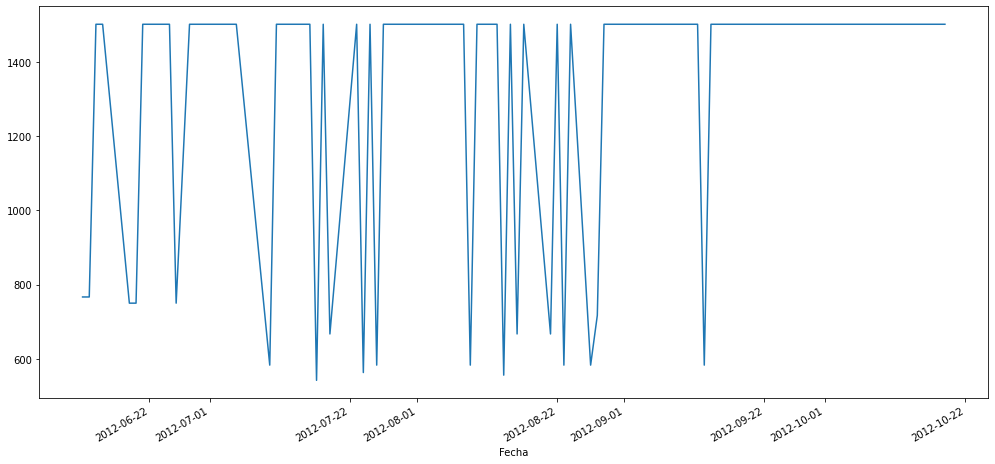

In [ ]:
df_arracacha2[" Precio "].plot(figsize=(17,8))

In [ ]:
#!pip install timeseries
#import local.lib.timeseries as ts
dt2 = ts.timeseries_as_many2one(df_arracacha2, columns=[" Precio "], nb_timesteps_in=4, timelag=0)
dt2.head()

,Precio _0,Precio _1,Precio _2,Precio _3,Precio
Fecha,,,,,
2012-06-19,766.670000,766.670000,1501.612898,1501.612898,750.000000
2012-06-20,766.670000,1501.612898,1501.612898,750.000000,750.000000
2012-06-21,1501.612898,1501.612898,750.000000,750.000000,1501.612898
2012-06-22,1501.612898,750.000000,750.000000,1501.612898,1501.612898
2012-06-25,750.000000,750.000000,1501.612898,1501.612898,1501.612898


(85, 5) (33, 5) (20, 5)


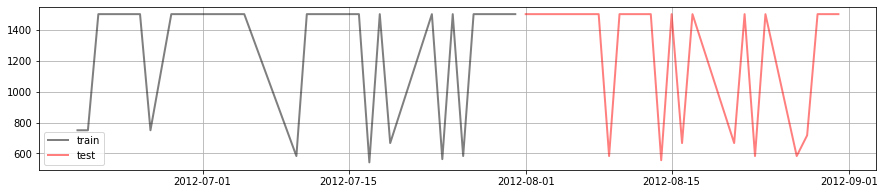

In [ ]:
trds = dt2[dt2.index.month<8]
tsds = dt2[dt2.index.month==8]
print(dt2.shape, trds.shape, tsds.shape)
plt.figure(figsize=(15,3))
plt.plot(trds.index.values, trds[' Precio '].values, color="black", lw=2, label="train", alpha=.5)
plt.plot(tsds.index.values, tsds[' Precio '].values, color="red", lw=2, label="test", alpha=.5)
plt.grid();
plt.legend();

In [ ]:
Xtr, ytr = trds[[i for i in trds.columns if i!=" Precio "]].values, trds[' Precio '].values
Xts, yts = tsds[[i for i in tsds.columns if i!=" Precio "]].values, tsds[' Precio '].values

In [ ]:
trds[:5]

,Precio _0,Precio _1,Precio _2,Precio _3,Precio
Fecha,,,,,
2012-06-19,766.670000,766.670000,1501.612898,1501.612898,750.000000
2012-06-20,766.670000,1501.612898,1501.612898,750.000000,750.000000
2012-06-21,1501.612898,1501.612898,750.000000,750.000000,1501.612898
2012-06-22,1501.612898,750.000000,750.000000,1501.612898,1501.612898
2012-06-25,750.000000,750.000000,1501.612898,1501.612898,1501.612898


In [ ]:
print (Xtr[:10])
print (ytr[:10])

[[ 766.67        766.67       1501.61289795 1501.61289795]
 [ 766.67       1501.61289795 1501.61289795  750.        ]
 [1501.61289795 1501.61289795  750.          750.        ]
 [1501.61289795  750.          750.         1501.61289795]
 [ 750.          750.         1501.61289795 1501.61289795]
 [ 750.         1501.61289795 1501.61289795 1501.61289795]
 [1501.61289795 1501.61289795 1501.61289795  750.        ]
 [1501.61289795 1501.61289795  750.         1501.61289795]
 [1501.61289795  750.         1501.61289795 1501.61289795]
 [ 750.         1501.61289795 1501.61289795 1501.61289795]]
[ 750.          750.         1501.61289795 1501.61289795 1501.61289795
  750.         1501.61289795 1501.61289795 1501.61289795 1501.61289795]


In [ ]:
tsds[:5]

,Precio _0,Precio _1,Precio _2,Precio _3,Precio
Fecha,,,,,
2012-08-01,583.000000,1501.612898,1501.612898,1501.612898,1501.612898
2012-08-03,1501.612898,1501.612898,1501.612898,1501.612898,1501.612898
2012-08-06,1501.612898,1501.612898,1501.612898,1501.612898,1501.612898
2012-08-08,1501.612898,1501.612898,1501.612898,1501.612898,1501.612898
2012-08-09,1501.612898,1501.612898,1501.612898,1501.612898,583.000000


In [ ]:
print (Xts[:10])
print (yts[:20])

[[ 583.         1501.61289795 1501.61289795 1501.61289795]
 [1501.61289795 1501.61289795 1501.61289795 1501.61289795]
 [1501.61289795 1501.61289795 1501.61289795 1501.61289795]
 [1501.61289795 1501.61289795 1501.61289795 1501.61289795]
 [1501.61289795 1501.61289795 1501.61289795 1501.61289795]
 [1501.61289795 1501.61289795 1501.61289795  583.        ]
 [1501.61289795 1501.61289795  583.         1501.61289795]
 [1501.61289795  583.         1501.61289795 1501.61289795]
 [ 583.         1501.61289795 1501.61289795  556.        ]
 [1501.61289795 1501.61289795  556.         1501.61289795]]
[1501.61289795 1501.61289795 1501.61289795 1501.61289795  583.
 1501.61289795 1501.61289795  556.         1501.61289795  667.
 1501.61289795  667.         1501.61289795  583.         1501.61289795
  583.          717.         1501.61289795 1501.61289795 1501.61289795]


In [ ]:
yts = (yts>Xts[:,-1]).astype(int)
ytr = (ytr>Xtr[:,-1]).astype(int)
print (ytr[:20])
print (yts[:20])

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0]


In [ ]:
print ("1's in train %.2f%s"%(np.mean(ytr)*100, "%"))
print ("1's in test  %.2f%s"%(np.mean(yts)*100, "%"))

1's in train 21.21%
1's in test  35.00%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

estimator = RandomForestClassifier(n_estimators=5, max_depth=30)
#estimator = DecisionTreeClassifier(max_depth=2)
#estimator = LogisticRegression()
#estimator = Pipeline((("pca", PCA(n_components=2)), ("estimator", estimator)))
estimator.fit(Xtr, ytr);

In [ ]:
print ("train accuracy %.2f"%estimator.score(Xtr,ytr))
print ("test accuracy  %.2f"%estimator.score(Xts,yts))

train accuracy 1.00
test accuracy  0.90


Text(0.5, 1.0, 'Confusion Matrix')

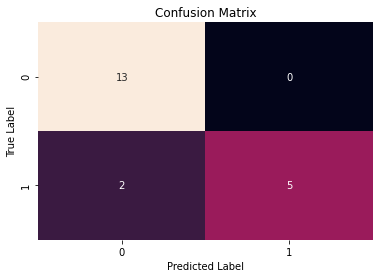

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(yts, estimator.predict(Xts))
sns.heatmap(cm, annot=True, cbar=False, fmt=".2g")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

**NOTA**: Se debe mejorar la limpieza sobre los datos de la columna Ciudad.